In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from task_3_modules import plot_mnist_sample, plot_missclassified_samples
from task_3_modules import CustomRandomForestClassifier
import dill
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
dill.load_session('task_3_notebook_env.db')

In [2]:
_X, _y = fetch_openml('mnist_784', return_X_y=True)

In [14]:
X = _X.values
y = _y.values
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

scaler = StandardScaler()
X_train_transform = scaler.fit_transform(X_train)
X_test_transform = scaler.fit_transform(X_test)

In [27]:
# LogRegression
logReg = LogisticRegression(penalty="l2", max_iter=50)
params = {}
logReg_clf = GridSearchCV(logReg, params, n_jobs=-1, cv=3)
logReg_clf.fit(X_train, y_train)
logReg_clf.score(X_test, y_test)

D:\Program Files\Python_3.9.1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9218

In [8]:
logReg_clf.fit(X_train_transform, y_train)
logReg_clf.score(X_test_transform, y_test)


D:\Program Files\Python_3.9.1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9249

D:\Program Files\Python_3.9.1\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


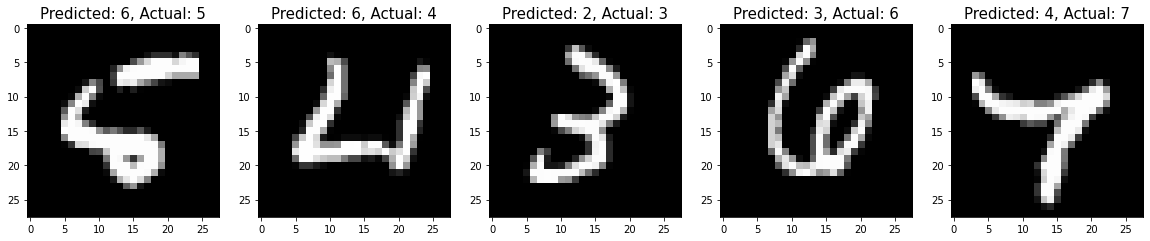

In [ ]:
#logReg.fit(X_train, y_train)
#plot_missclassified_samples(logReg, X_test, y_test, num=5)

In [7]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
cv_score = cross_val_score(knn, X_train, y_train, cv=3)
print(cv_score)

[0.9676  0.9671  0.96755]


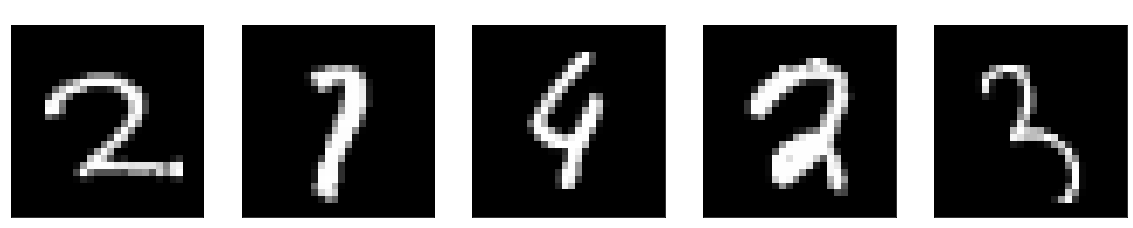

In [ ]:
#knn.fit(X_test, y_test)
#plot_missclassified_samples(knn, X_test, y_test)

In [13]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion="entropy", max_depth=10)
cv_score = cross_val_score(dtree, X_train, y_train, cv=3, n_jobs=-1)
print(cv_score)

[0.85455 0.8543  0.87075]


In [38]:
rf_lib = RandomForestClassifier(10)
rf_lib.fit(X_train, y_train)
rf_lib.score(X_test, y_test)

0.9498

In [46]:
rf_my = CustomRandomForestClassifier(1)
rf_my.fit(X_train, y_train)
rf_my.score(X_test, y_test)

0.6219

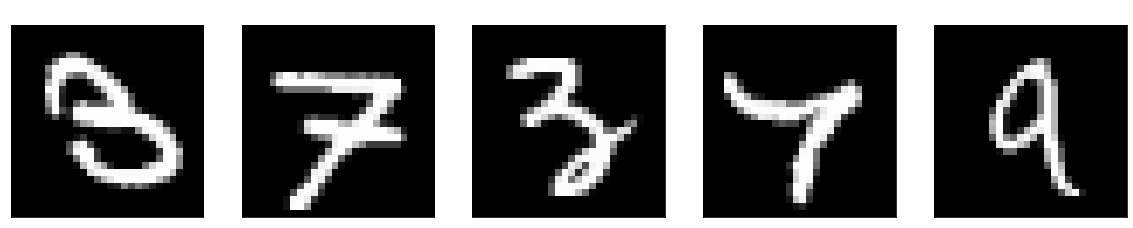

In [192]:
#plot_missclassified_samples(dtree, X_test, y_test)

In [15]:
# Linear SVM
linearSVM = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
params = {'C': [1e-1, 1, 1e+1], 'max_iter': [10, 100]}
clf = GridSearchCV(linearSVM, params, n_jobs=-1, cv=3)
clf.fit(X_train_transform, y_train)
clf.score(X_test_transform, y_test)

D:\Program Files\Python_3.9.1\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9125

In [16]:
clf.best_params_

{'C': 0.1, 'max_iter': 100}

D:\Program Files\Python_3.9.1\lib\site-packages\sklearn\svm\_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


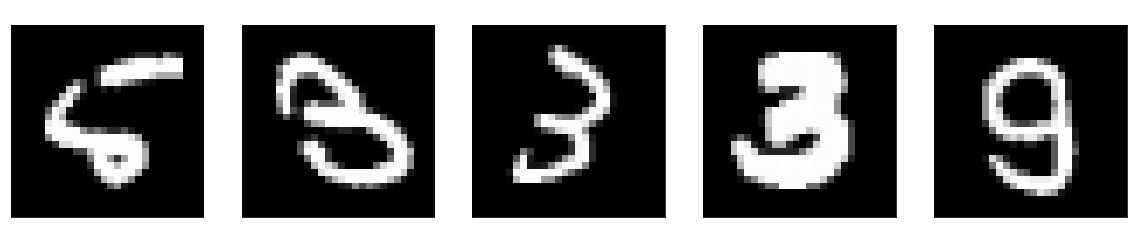

In [203]:
#linearSVM.fit(X_test, y_test)
#plot_missclassified_samples(linearSVM, X_test, y_test)

In [28]:
SVM = SVC(kernel='rbf')
params = {'C': [10], 'max_iter': [100]}

svm_gs = GridSearchCV(SVM, params, n_jobs=-1, cv=3)
svm_pipe = make_pipeline(Normalizer(), svm_gs)

svm_pipe.fit(X_train, y_train)
svm_pipe.score(X_test, y_test)

D:\Program Files\Python_3.9.1\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


0.9639

In [29]:
svm_gs.best_params_

{'C': 10, 'max_iter': 100}

In [30]:
dill.dump_session('task_3_notebook_env.db')

L = log(1 + e^(-M))
M = <x_i, w>y_i = y_i * (x_i_1 * w_1 + x_i_2 * w_2)

dL/dw_1 = 1 / (1 + e^(-M)) * y_i * x_i_1
dL/dw_1 = 1 / (1 + e^(-M)) * y_i * x_i_2
grad(L) = y_i * x_i / (1 + e^(-M)) # x_i - vector

w = w - h * grad(L) # w-2D
w = w - h * SUM(i){y_i * x_i / (1 + e^(-M))}